# preprocessing data

In [511]:
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

In [512]:
import warnings
warnings.filterwarnings('ignore')

In [525]:
data = 'adult.csv'
df = pd.read_csv(data, header=None)

In [526]:
df.shape

(48843, 15)

In [527]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,AGE,WORKCLASS,FNLWGT,EDUCATION,EDUCATION-NUM,MARITAL-STATUS,OCCUPATION,RELATIONSHIP,RACE,SEX,CAPITAL-GAIN,CAPITAL-LOSS,HOURS-PER-WEEK,NATIVE-COUNTRY,SALARY
1,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K
2,35,Self-emp-inc,182148,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,60,United-States,>50K
3,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
4,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K


In [528]:
col_names = [df[i][0] for i in range(df.shape[1])]
col_names

['AGE',
 'WORKCLASS',
 'FNLWGT',
 'EDUCATION',
 'EDUCATION-NUM',
 'MARITAL-STATUS',
 'OCCUPATION',
 'RELATIONSHIP',
 'RACE',
 'SEX',
 'CAPITAL-GAIN',
 'CAPITAL-LOSS',
 'HOURS-PER-WEEK',
 'NATIVE-COUNTRY',
 'SALARY']

In [529]:
df = df[1:]
df.columns = col_names
df

,AGE,WORKCLASS,FNLWGT,EDUCATION,EDUCATION-NUM,MARITAL-STATUS,OCCUPATION,RELATIONSHIP,RACE,SEX,CAPITAL-GAIN,CAPITAL-LOSS,HOURS-PER-WEEK,NATIVE-COUNTRY,SALARY
1,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K
2,35,Self-emp-inc,182148,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,60,United-States,>50K
3,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
4,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
5,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48838,48,Local-gov,349230,Masters,14,Divorced,Other-service,Not-in-family,White,Male,0,0,40,United-States,<=50K
48839,33,Private,245211,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K
48840,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
48841,64,?,321403,HS-grad,9,Widowed,?,Other-relative,Black,Male,0,0,40,United-States,<=50K


#data analysis

In [532]:
for col in col_names:
    print(df[col].value_counts())

36    1348
35    1337
33    1335
23    1329
31    1325
      ... 
88       6
85       5
87       3
89       2
86       1
Name: AGE, Length: 74, dtype: int64
 Private             33906
 Self-emp-not-inc     3862
 Local-gov            3136
 ?                    2799
 State-gov            1981
 Self-emp-inc         1695
 Federal-gov          1432
 Without-pay            21
 Never-worked           10
Name: WORKCLASS, dtype: int64
 203488    21
 120277    19
 190290    19
 125892    18
 126569    18
           ..
 185942     1
 234220     1
 214706     1
 119913     1
 350977     1
Name: FNLWGT, Length: 28523, dtype: int64
 HS-grad         15784
 Some-college    10878
 Bachelors        8025
 Masters          2657
 Assoc-voc        2061
 11th             1812
 Assoc-acdm       1601
 10th             1389
 7th-8th           955
 Prof-school       834
 9th               756
 12th              657
 Doctorate         594
 5th-6th           509
 1st-4th           247
 Preschool          83
Name: 

In [519]:
df.isnull().sum()

AGE               0
WORKCLASS         0
FNLWGT            0
EDUCATION         0
EDUCATION-NUM     0
MARITAL-STATUS    0
OCCUPATION        0
RELATIONSHIP      0
RACE              0
SEX               0
CAPITAL-GAIN      0
CAPITAL-LOSS      0
HOURS-PER-WEEK    0
NATIVE-COUNTRY    0
SALARY            0
dtype: int64

In [520]:
!pip install category_encoders

In [530]:
from sklearn.model_selection import train_test_split
import category_encoders as ce

# splitting the dataset function
def make_data(df, test_size_param):
  X = df.drop(['SALARY'], axis=1)
  y = df['SALARY']

  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size_param, random_state = 42)
  encoder = ce.OrdinalEncoder(cols=['AGE','WORKCLASS','FNLWGT','EDUCATION','EDUCATION-NUM','MARITAL-STATUS',
                                    'OCCUPATION','RELATIONSHIP','RACE','SEX','CAPITAL-GAIN','CAPITAL-LOSS','HOURS-PER-WEEK',
                                    'NATIVE-COUNTRY'])
  X_train = encoder.fit_transform(X_train)
  X_test = encoder.transform(X_test)

  return X_train, X_test, y_train, y_test

In [531]:
X_train, X_test, y_train, y_test = make_data(df, test_size_param=0.15)
X_train

,AGE,WORKCLASS,FNLWGT,EDUCATION,EDUCATION-NUM,MARITAL-STATUS,OCCUPATION,RELATIONSHIP,RACE,SEX,CAPITAL-GAIN,CAPITAL-LOSS,HOURS-PER-WEEK,NATIVE-COUNTRY
40108,1,1,1,1,1,1,1,1,1,1,1,1,1,1
19923,2,2,2,2,2,2,2,2,1,1,1,1,1,1
16798,3,1,3,1,1,1,3,1,1,2,1,1,1,1
10348,1,1,4,3,3,1,4,3,1,2,1,1,1,2
14505,4,1,5,4,4,1,5,3,1,2,1,1,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11285,14,1,25635,1,1,2,4,2,1,1,1,1,1,1
44733,5,1,25636,1,1,3,7,3,1,1,1,1,1,1
38159,18,1,10792,5,5,2,2,6,1,2,1,1,1,1
861,17,1,6862,5,5,1,2,1,1,2,1,1,1,1


#modeling tree

In [537]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_recall_curve, classification_report
from sklearn import tree

# creating decistion tree and report
def make_tree(df, criterion_param="entropy", test_size_param=0.15, max_depth_param=None):
  X_train, X_test, y_train, y_test = make_data(df, test_size_param)
  clf_en = DecisionTreeClassifier(criterion=criterion_param, random_state=0, max_depth=max_depth_param)  # Create Decision Tree classifer object
  clf_en.fit(X_train, y_train)                                                # Train Decision Tree Classifer
  y_pred_en = clf_en.predict(X_test)                                          # Predict the response for test dataset

  print(classification_report(y_test, clf_en.predict(X_test)))

  fn=['AGE','WORKCLASS','FNLWGT','EDUCATION','EDUCATION-NUM','MARITAL-STATUS',
      'OCCUPATION','RELATIONSHIP','RACE','SEX','CAPITAL-GAIN','CAPITAL-LOSS',
      'HOURS-PER-WEEK','NATIVE-COUNTRY','SALARY']
  cn = ['<=50K', '>50K']
  plt.figure(figsize=(40,20))
  tree.plot_tree(clf_en.fit(X_train, y_train), fontsize=10, feature_names = fn, 
               class_names = cn, filled = True)

  return clf_en

              precision    recall  f1-score   support

       <=50K       0.88      0.84      0.86     14860
        >50K       0.54      0.62      0.58      4677

    accuracy                           0.78     19537
   macro avg       0.71      0.73      0.72     19537
weighted avg       0.80      0.78      0.79     19537



DecisionTreeClassifier(criterion='entropy', random_state=0)

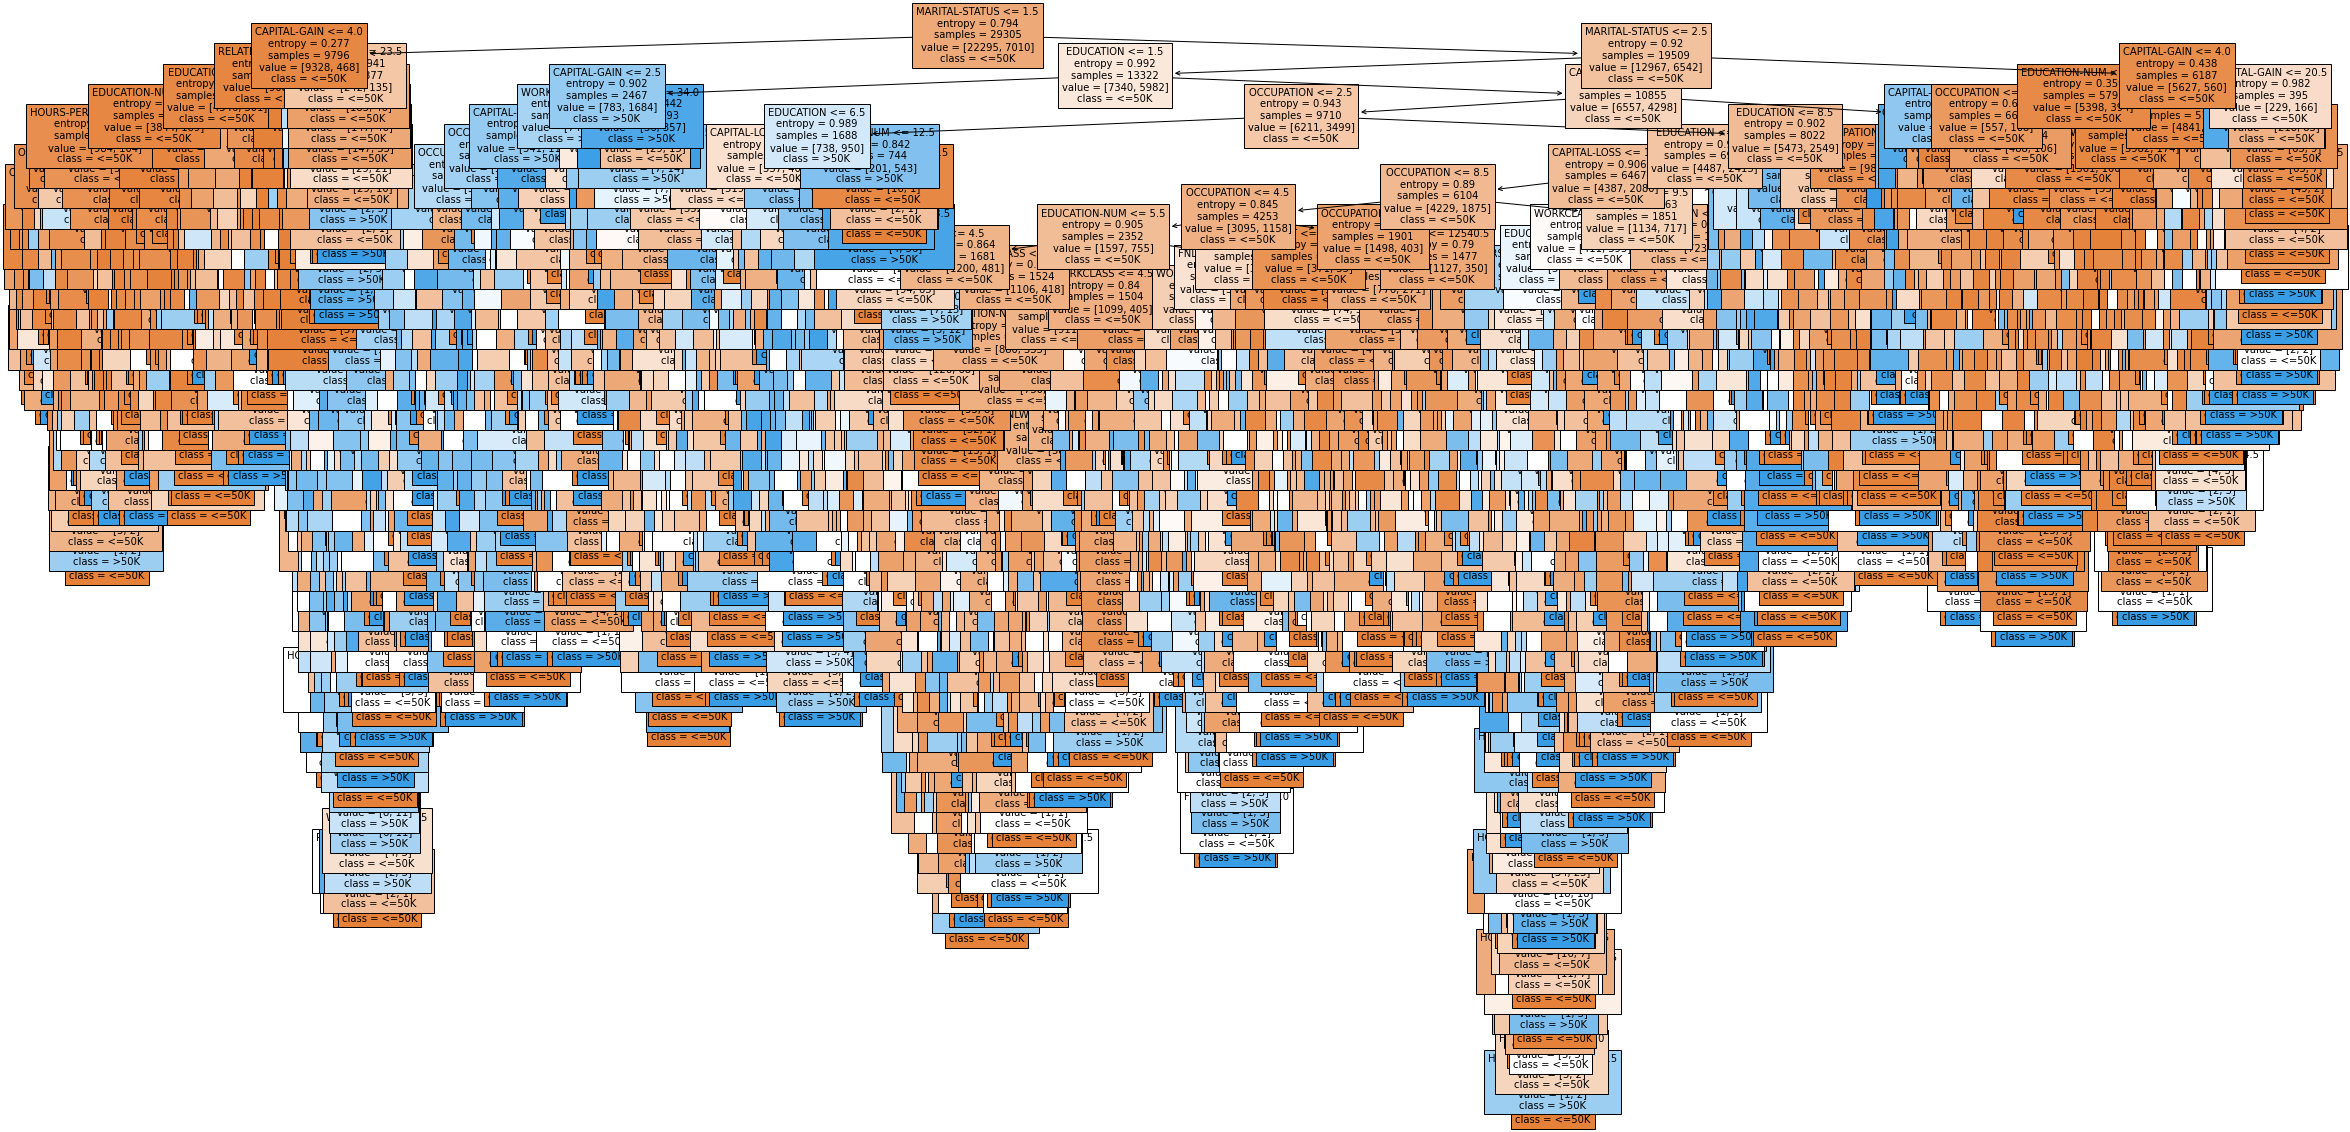

In [534]:
make_tree(df, criterion_param="entropy", test_size_param=0.4)

              precision    recall  f1-score   support

       <=50K       0.83      0.94      0.88     14860
        >50K       0.68      0.39      0.49      4677

    accuracy                           0.81     19537
   macro avg       0.75      0.67      0.69     19537
weighted avg       0.79      0.81      0.79     19537



DecisionTreeClassifier(max_depth=4, random_state=0)

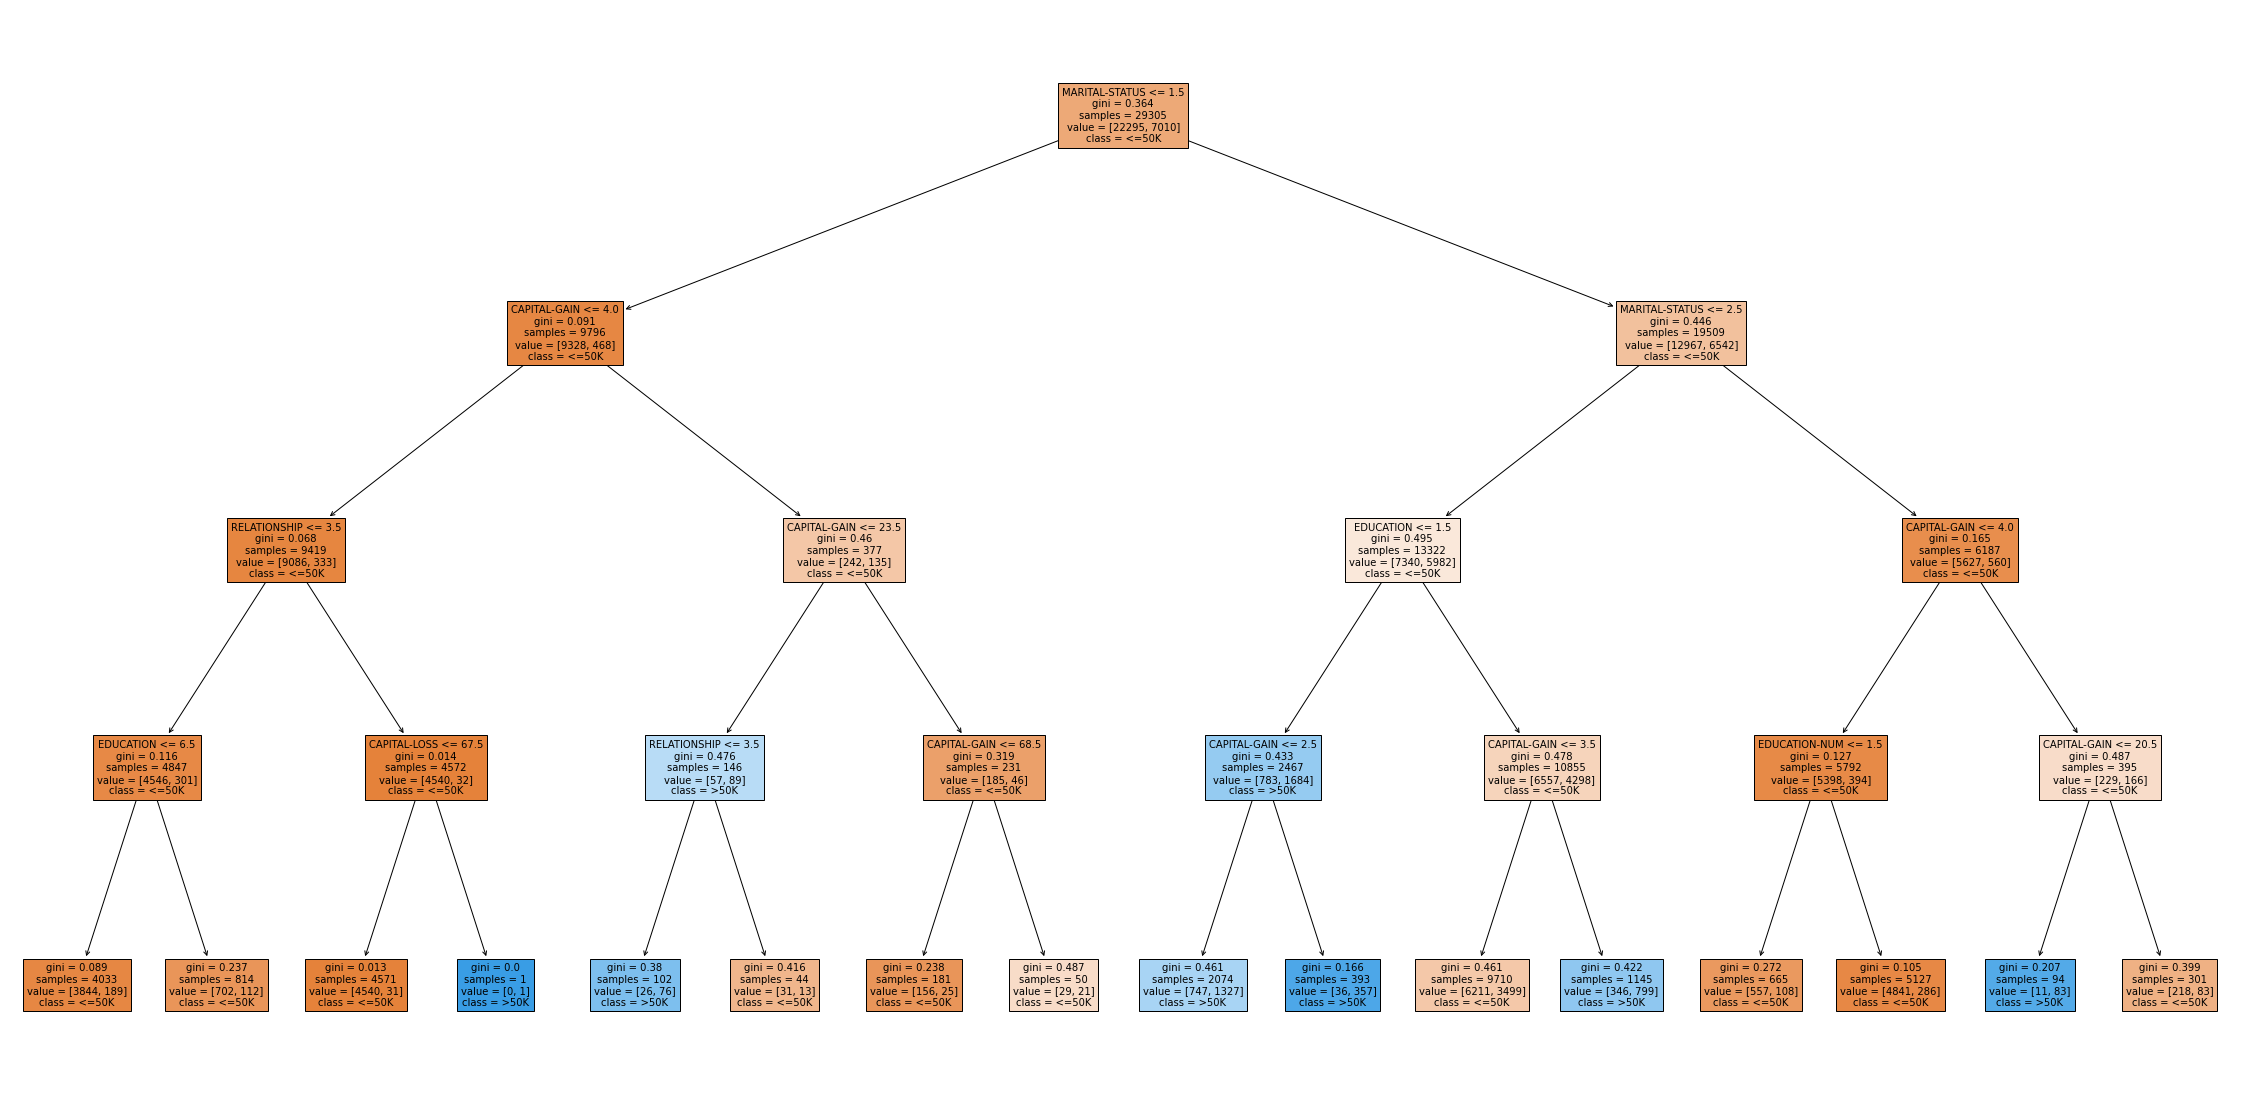

In [547]:
make_tree(df, criterion_param="gini", test_size_param=0.4, max_depth_param=4)

              precision    recall  f1-score   support

       <=50K       0.87      0.89      0.88     11173
        >50K       0.62      0.58      0.60      3480

    accuracy                           0.82     14653
   macro avg       0.75      0.73      0.74     14653
weighted avg       0.81      0.82      0.81     14653



DecisionTreeClassifier(max_depth=4, random_state=0)

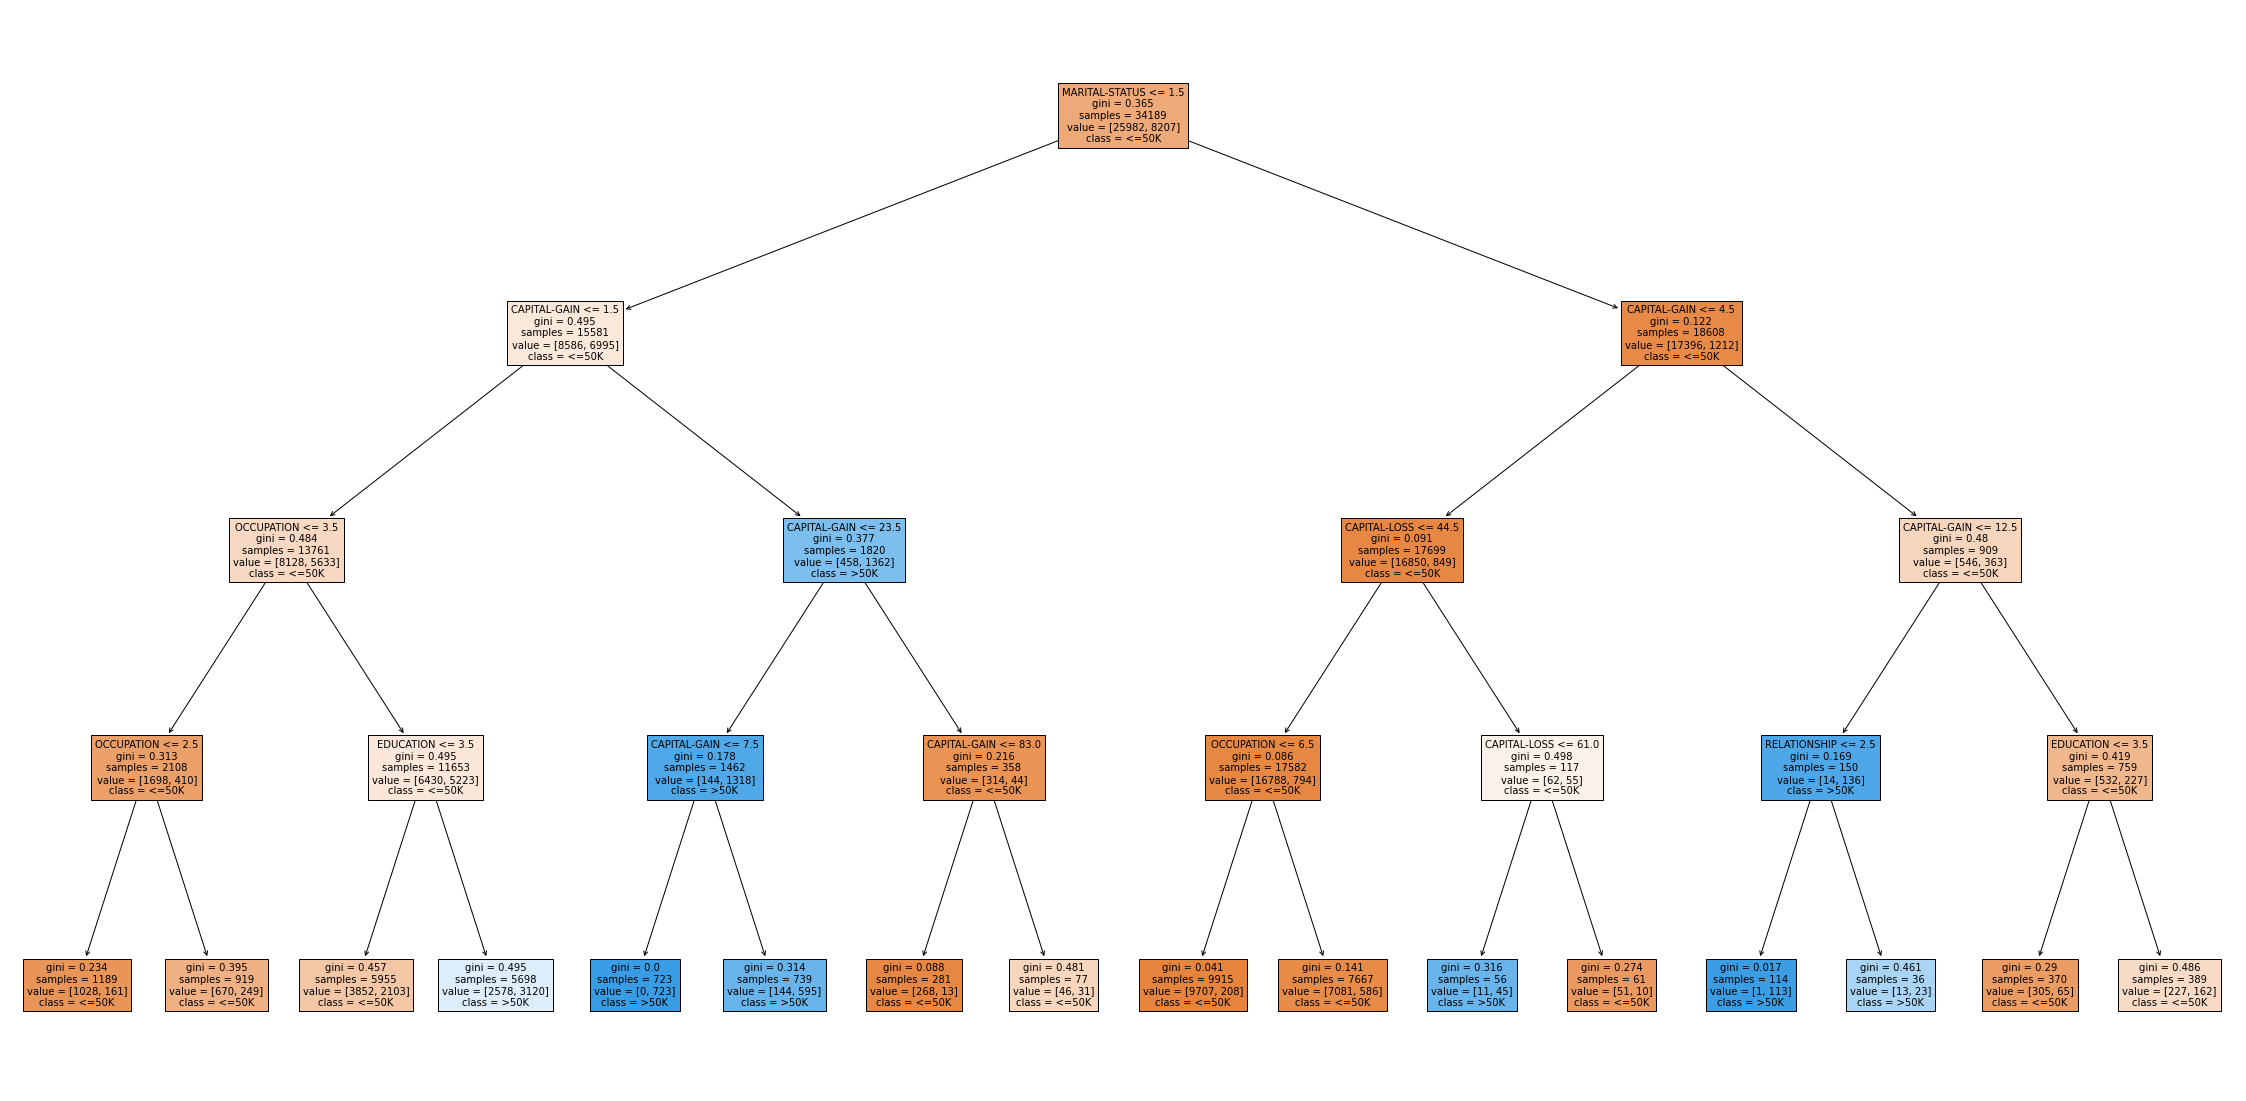

In [548]:
make_tree(df, criterion_param="gini", test_size_param=0.3, max_depth_param=4)

              precision    recall  f1-score   support

       <=50K       0.85      0.93      0.89      7451
        >50K       0.68      0.46      0.55      2318

    accuracy                           0.82      9769
   macro avg       0.76      0.69      0.72      9769
weighted avg       0.81      0.82      0.81      9769



DecisionTreeClassifier(max_depth=4, random_state=0)

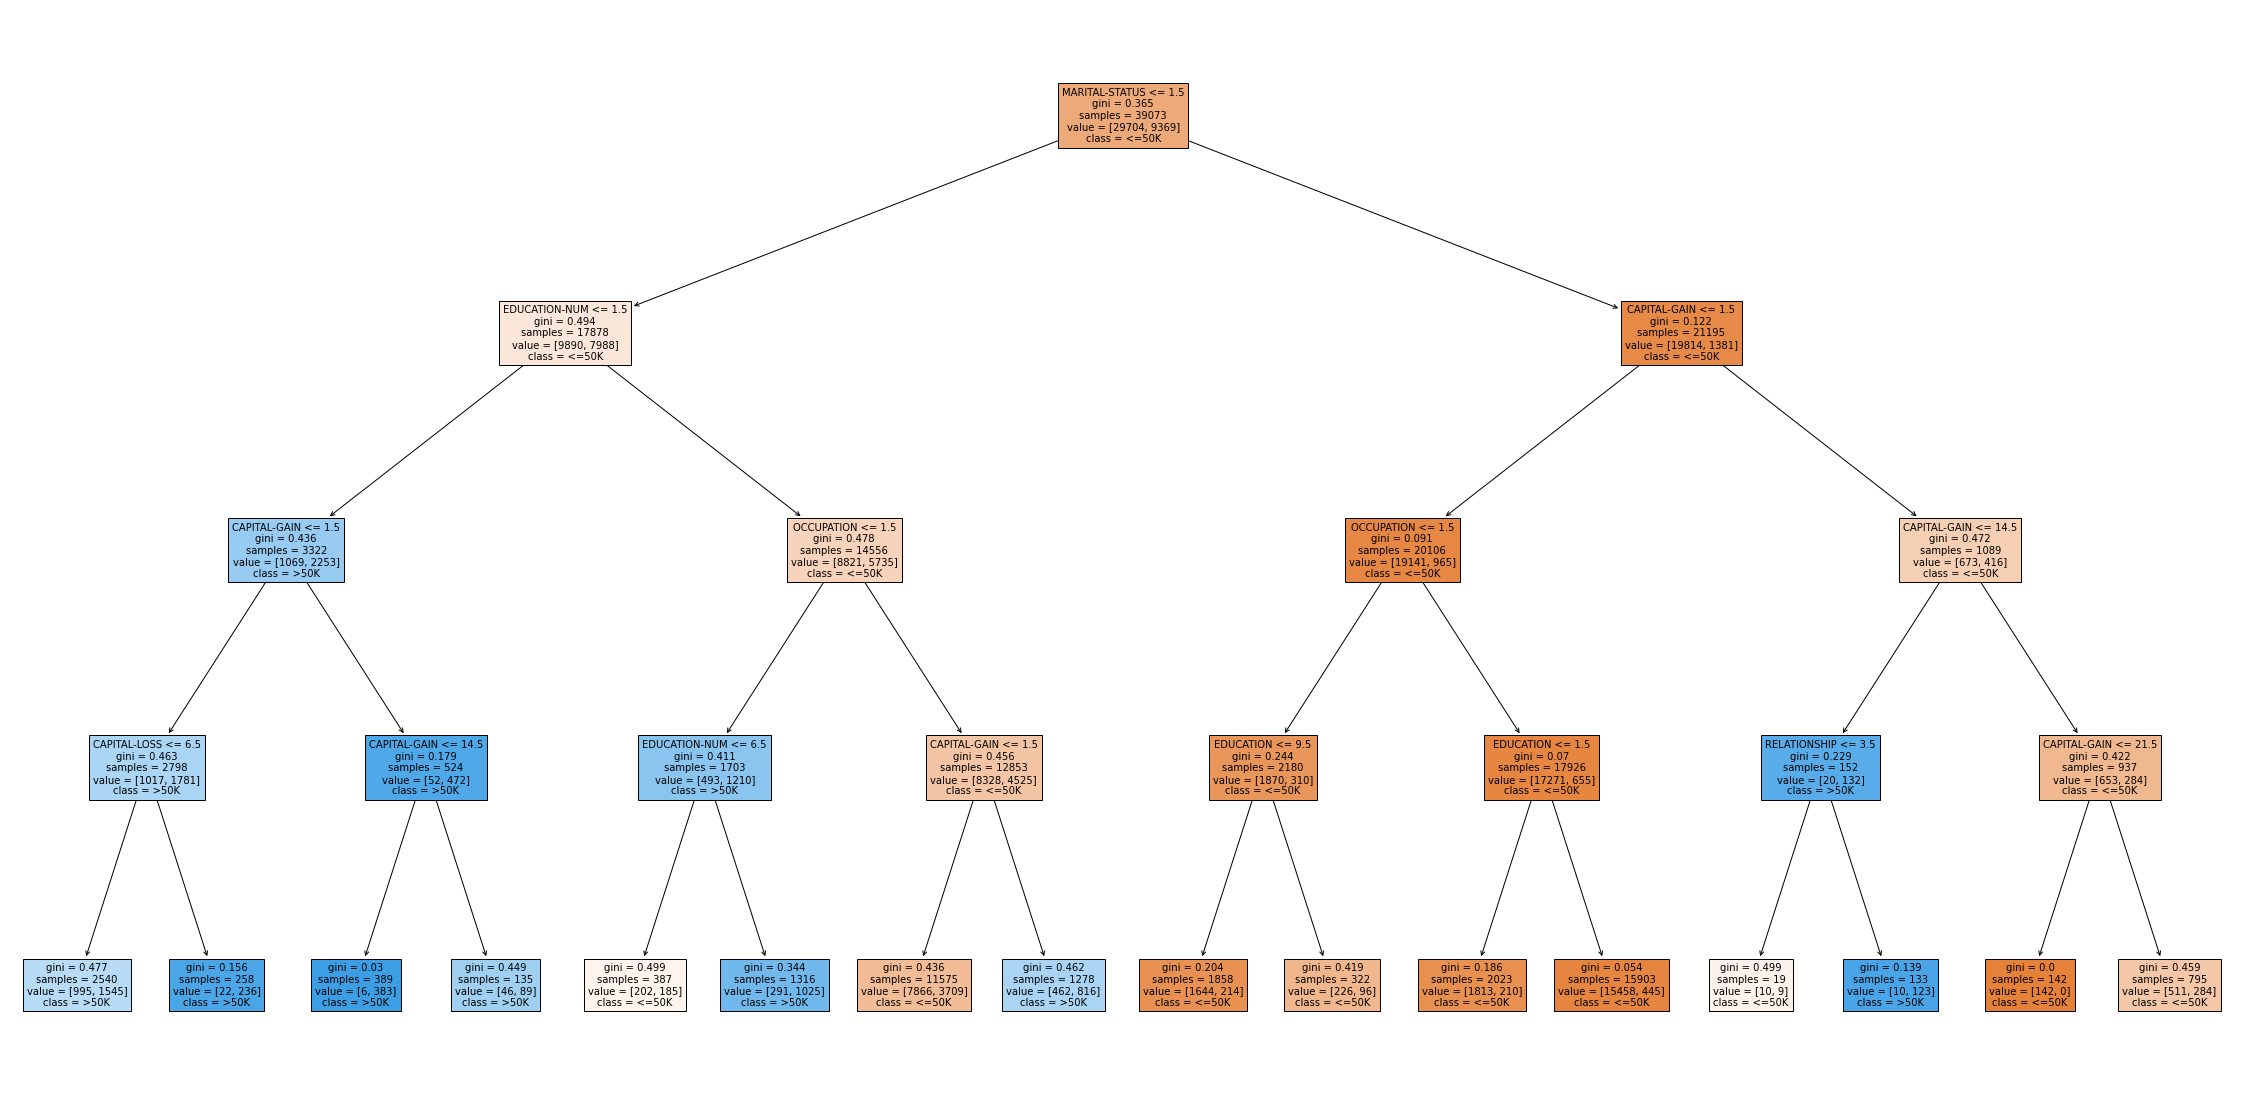

In [549]:
make_tree(df, criterion_param="gini", test_size_param=0.2, max_depth_param=4)

              precision    recall  f1-score   support

       <=50K       0.88      0.87      0.88      3752
        >50K       0.59      0.60      0.60      1133

    accuracy                           0.81      4885
   macro avg       0.74      0.74      0.74      4885
weighted avg       0.81      0.81      0.81      4885



DecisionTreeClassifier(max_depth=4, random_state=0)

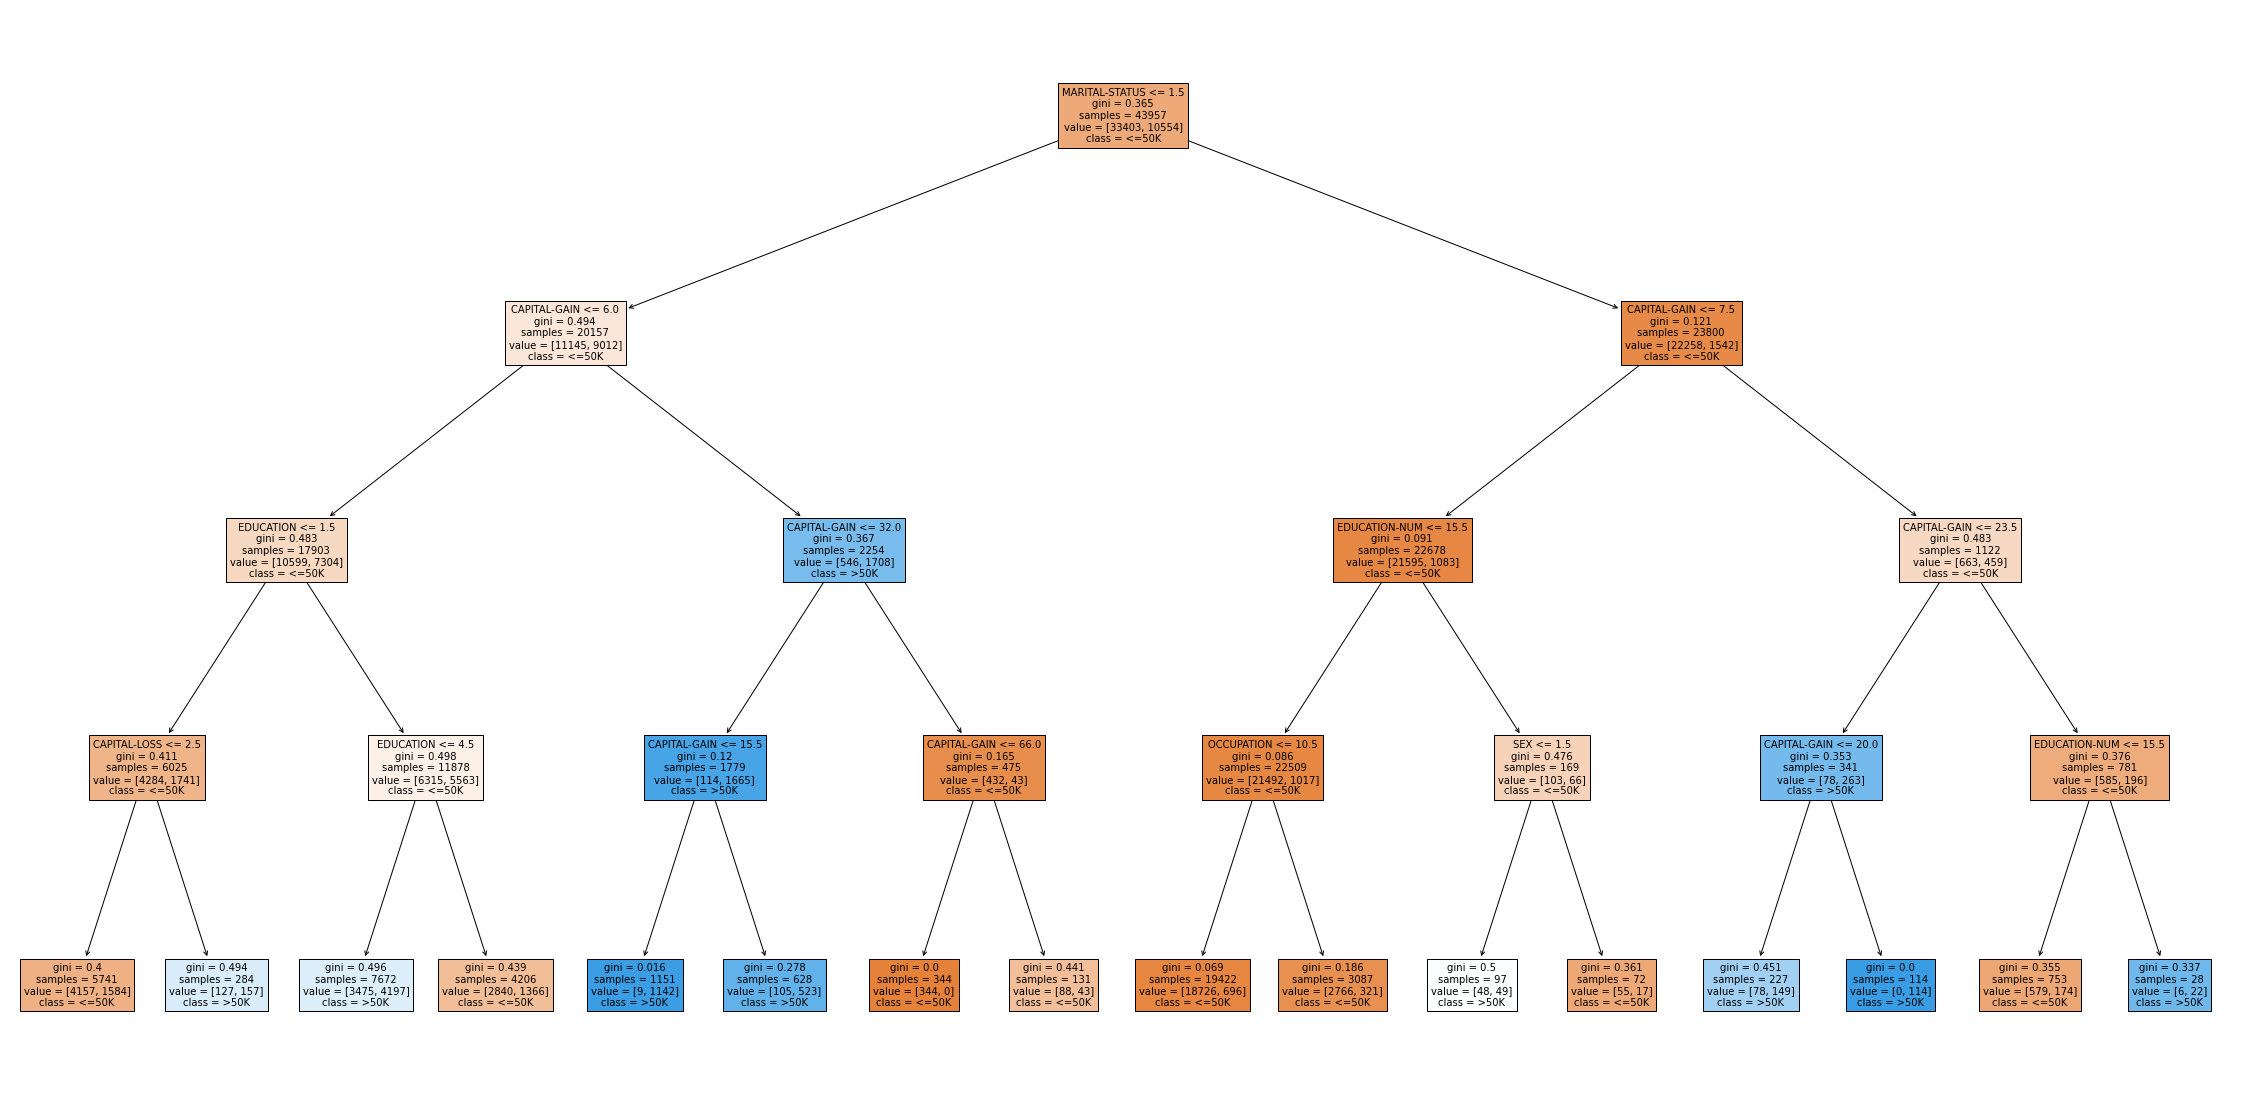

In [550]:
make_tree(df, criterion_param="gini", test_size_param=0.1, max_depth_param=4)